# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [31]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


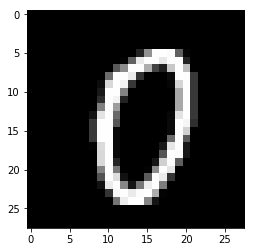

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
import numpy as np

train_mask1 = np.isin(y_train, [0, 1, 2, 3, 4])
test_mask1 = np.isin(y_test, [0, 1, 2, 3, 4])

train_mask2 = np.isin(y_train, [5, 6, 7, 8, 9])
test_mask2 = np.isin(y_test, [5, 6, 7, 8, 9])

In [0]:
# Train and Test DataSet with 0 to 4 digits
X_train1, y_train1 = X_train[train_mask1], y_train[train_mask1]
X_test1, y_test1 = X_test[test_mask1 ], y_test[test_mask1 ]

# Train and Test DataSet with 5 to 9 digits
X_train2, y_train2 = X_train[train_mask2], y_train[train_mask2]
X_test2, y_test2 = X_test[test_mask2], y_test[test_mask2]

In [35]:
np.unique(y_test1)

array([0, 1, 2, 3, 4], dtype=uint8)

In [36]:
np.unique(y_test2)

array([5, 6, 7, 8, 9], dtype=uint8)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [37]:
# Dataset-1 for 0-4 labels
print (X_train1.shape,  y_train1.shape)
print (X_test1.shape,  y_test1.shape)

(30596, 28, 28) (30596,)
(5139, 28, 28) (5139,)


In [38]:
# Dataset-2 for 5-9 labels
print (X_train2.shape,  y_train2.shape)
print (X_test2.shape,  y_test2.shape)

(29404, 28, 28) (29404,)
(4861, 28, 28) (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
#reshape first dataset
X_train1 = X_train1.reshape(X_train1.shape[0],28,28,1)
X_test1 = X_test1.reshape(X_test1.shape[0],28,28,1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train1= X_train1.astype('float32')
X_train1/=255

X_test1= X_test1.astype('float32')
X_test1/=255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [41]:
X_train1.shape

(30596, 28, 28, 1)

In [42]:
print ("Num of Images in X_train =", X_train1.shape[0])
print ("Num of Images in X_test =", X_test1.shape[0])

Num of Images in X_train = 30596
Num of Images in X_test = 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import keras

In [0]:
#Encoding the output class label (One-Hot Encoding)
y_train1= keras.utils.to_categorical(y_train1)
y_test1 = keras.utils.to_categorical(y_test1)

In [45]:
print (y_train1.shape, y_test1.shape)

(30596, 5) (5139, 5)


## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D

In [47]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [51]:
model.fit(X_train1, y_train1, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test1,y_test1))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 11s 356us/step - loss: 0.4682 - acc: 0.8886 - val_loss: 0.1151 - val_acc: 0.9687
Epoch 2/10
30596/30596 [==============================] - 4s 129us/step - loss: 0.1310 - acc: 0.9594 - val_loss: 0.0875 - val_acc: 0.9739
Epoch 3/10
30596/30596 [==============================] - 4s 129us/step - loss: 0.1102 - acc: 0.9660 - val_loss: 0.0743 - val_acc: 0.9786
Epoch 4/10
30596/30596 [==============================] - 4s 128us/step - loss: 0.0982 - acc: 0.9686 - val_loss: 0.0620 - val_acc: 0.9825
Epoch 5/10
30596/30596 [==============================] - 4s 129us/step - loss: 0.0892 - acc: 0.9722 - val_loss: 0.0568 - val_acc: 0.9838
Epoch 6/10
30596/30596 [==============================] - 4s 128us/step - loss: 0.0827 - acc: 0.9743 - val_loss: 0.0516 - val_acc: 0.9842
Epoch 7/10
30596/30596 [====

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [52]:
acc_score = model.evaluate(X_train1, y_train1, verbose=0)
print ("accuracy=", acc_score[1])

accuracy= 0.9840502026408681


In [0]:
y_test_pred1_class = model.predict_classes(X_test1)

In [54]:
y_test_pred1_class

array([2, 1, 0, ..., 2, 3, 4])

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [55]:
model.layers

In [56]:
#Set pre-trained model layers to not trainable (except for Dense layer)
for layer in model.layers:
  str_sub = str(layer)
  if (str_sub.find('core.Dense') == -1):
    print (str_sub)
    layer.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train2-=5
y_test2-=5

In [58]:
y_train2

array([0, 4, 0, ..., 0, 1, 3], dtype=uint8)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
#reshape first dataset
X_train2 = X_train2.reshape(X_train2.shape[0],28,28,1)
X_test2 = X_test2.reshape(X_test2.shape[0],28,28,1)

In [60]:
print (X_train2.shape, X_test2.shape)

(29404, 28, 28, 1) (4861, 28, 28, 1)


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train2= X_train2.astype('float32')
X_train2/=255

X_test2= X_test2.astype('float32')
X_test2/=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [62]:
X_train2.shape

(29404, 28, 28, 1)

In [63]:
print ("Num of Images in X_train =", X_train2.shape[0])
print ("Num of Images in X_test =", X_test2.shape[0])

Num of Images in X_train = 29404
Num of Images in X_test = 4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
#Encoding the output class label (One-Hot Encoding)
y_train2= keras.utils.to_categorical(y_train2)
y_test2 = keras.utils.to_categorical(y_test2)

In [65]:
print (y_train2.shape, y_test2.shape)

(29404, 5) (4861, 5)


### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [66]:
model.fit(X_train2, y_train2, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test2,y_test2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 4s 138us/step - loss: 0.3486 - acc: 0.8939 - val_loss: 0.1847 - val_acc: 0.9399
Epoch 2/10
29404/29404 [==============================] - 4s 130us/step - loss: 0.1682 - acc: 0.9454 - val_loss: 0.1308 - val_acc: 0.9609
Epoch 3/10
29404/29404 [==============================] - 4s 129us/step - loss: 0.1404 - acc: 0.9549 - val_loss: 0.1131 - val_acc: 0.9640
Epoch 4/10
29404/29404 [==============================] - 4s 128us/step - loss: 0.1228 - acc: 0.9596 - val_loss: 0.1030 - val_acc: 0.9659
Epoch 5/10
29404/29404 [==============================] - 4s 129us/step - loss: 0.1083 - acc: 0.9643 - val_loss: 0.0980 - val_acc: 0.9661
Epoch 6/10
29404/29404 [==============================] - 4s 128us/step - loss: 0.0997 - acc: 0.9690 - val_loss: 0.0854 - val_acc: 0.9716
Epoch 7/10
29404/29404 [==============================] - 4s 128us/step - loss: 0.0940 - acc: 0.9698 - val_loss: 0.0832 - v

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [67]:
acc_score2 = model.evaluate(X_train2, y_train2, verbose=0)
print ("accuracy=", acc_score2[1])

accuracy= 0.9804788464154537


In [68]:
y_test_pred1_class = model.predict_classes(X_test1)
y_test_pred1_class

array([1, 2, 1, ..., 3, 0, 4])

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# read tweets.csv into a DataFrame
tweets_df = pd.read_csv('/gdrive/My Drive/tweets.csv', encoding='latin')

In [4]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


### Drop null values
- drop all the rows with null values

In [6]:
# Check if there are any missing values
tweets_df.isnull().values.any()

True

In [0]:
# Drop rows which has null values
tweets_df = tweets_df.dropna()

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [8]:
tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
tweets_df = tweets_df.applymap(lambda x:x.lower() if type(x) == str else x)

In [0]:
import re
pattern = r'[^a-zA-z0-9#+_\s]'
tweets_df = tweets_df.applymap(lambda x: re.sub(pattern,'', x))

In [0]:
tweets_df = tweets_df.applymap(lambda x: x.strip())

print dataframe

In [12]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
# create a new DataFrame that only contains "positive emotion" or "negative emotion"
updated_df = tweets_df[(tweets_df.is_there_an_emotion_directed_at_a_brand_or_product =='positive emotion') | (tweets_df.is_there_an_emotion_directed_at_a_brand_or_product =='negative emotion')]

In [14]:
# Displays customer distribution based on churn 
print (updated_df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts())

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
updated_df.is_there_an_emotion_directed_at_a_brand_or_product = updated_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion': 1, 'negative emotion': 0})

In [16]:
print (updated_df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts())

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
# define X and y
X = updated_df.tweet_text
y = updated_df.is_there_an_emotion_directed_at_a_brand_or_product

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

In [0]:
X_train_dtm = vect.fit_transform(X_train)

In [0]:
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# use Naive Bayes to predict the star rating
lr = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [23]:
lr.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# use Naive Bayes to predict the star rating
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [25]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [26]:
# calculate accuracy
y_pred_class_lr = lr.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class_lr))

0.8634085213032582


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [27]:
# calculate accuracy
y_pred_class_nb = nb.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.8571428571428571


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [28]:
print (metrics.accuracy_score(y_test, y_pred_class_lr))

0.8634085213032582


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [29]:
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.8571428571428571
